## Name: Mithun Muralidhar
## ASU ID: 1211309824

## Ridge Regression Optimization

We generate two highly correlated features X1 and X2 from a multli-variate normal distribution, we would like to implement the Ridge regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
# Please try to use only these packages for computation

n = 1000
p = 2
#X1 = np.linspace(0,1,n)
#X2 = X1 + np.random.normal
mean = np.zeros((p))
val = 0.99
cov = np.ones((p,p))*val
cov = cov + np.eye(p)*(1-val)

np.random.seed(10)
X = np.random.multivariate_normal(mean, cov, n)
theta_true = np.ones((p,1))



In [2]:
X

array([[-1.37883123, -1.2776755 ],
       [ 1.54212478,  1.54093912],
       [-0.56886295, -0.67069843],
       ..., 
       [-0.56168953, -0.47213548],
       [-1.17606098, -1.12341923],
       [-0.73164837, -0.48977895]])

In [3]:
n=1000
p=2
val=0.99
cov=np.ones((p,p))*val
print (cov)
print(np.ones((p,p)))

[[ 0.99  0.99]
 [ 0.99  0.99]]
[[ 1.  1.]
 [ 1.  1.]]


We first generate data based on $y=X\theta+e$, where $e$ follows $N(0,\delta^2)$, with $\delta=0.5$

In [4]:
delta=0.5
e=np.random.normal(0,delta,(n,1))
y=np.dot(X,theta_true)+e

### Part 1: Analytical solution
(1) Let's compute the Least Square analytical solution directly by solving $X^T X \theta = X^T y$

In [5]:
lambda1 = 20
beta_OLS_est=np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T,y))
print(beta_OLS_est)

[[ 1.10034069]
 [ 0.89299444]]


(2) Let's compute the Ridge Regression analytical solution directly by solving $(X^T X +\lambda_1 I) \theta = X^T y$

In [6]:
lambda1=30
I=np.eye(2)
beta_ridge_est=np.dot(np.linalg.inv(np.dot(X.T,X)+np.dot(lambda1,I)), np.dot(X.T,y))
print(beta_ridge_est)

[[ 1.0053259 ]
 [ 0.95681108]]


### Part 2: Gradient Descent

(a) Let's use Gradient Descent to solve the solution, first, we would like to define the loss Function. 
We can define the `computeCost(X,y,lambda1,beta)` by
$\|y-X\beta\|^2+\lambda_1 * \|\beta\|^2$
and its gradient in `computeGrad(X, y, lambda1,beta)`

In [7]:
#Estimating cost function
def computeCost(X, y,lambda1, beta):
    yhat=np.matmul(X,beta)
    diff=y-yhat
    vec_norm=np.linalg.norm(diff)
    beta_norm=np.linalg.norm(beta)
    beta_norm_sq=beta_norm**2
    cost=vec_norm**2+ np.dot(lambda1,beta_norm_sq)
    return cost


#Estimating the Gradient function    
def computeGrad(X, y,lambda1,beta):
    yhat=np.matmul(X,beta)
    diff=y-yhat
    gradient=-2*np.dot(X.T, diff)+ 2*lambda1*beta
    return gradient



(b) Let's use Gradient Descent to update parameter until convergence, please try different stepsize to see the Convergence performance. 

In [8]:
def gradientDescent(X, y, beta,alpha, numIterations):
# Implement your gradient descient algorithm here
    beta_values=[]
    loss_values=[]
    for i in range(0, numIterations):
        cost=computeCost(X,y,lambda1,beta)
        loss_values.append(cost)
        if i%20==0:
            print("Iteration %d --- beta:[ %0.5f, %0.5f] --- Cost: %0.5f " % (i, beta[0],beta[1],cost))
        gradient = computeGrad(X, y,lambda1, beta)
        beta = beta-alpha * gradient
        beta_values.append(beta)
    print("\n final beta: [ %0.5f, %0.5f] \n"%(beta.flatten()[0],beta.flatten()[1]))
    return beta,beta_values,loss_values
numIterations=100
alpha_1=0.0001
init_beta=np.array([[-1],[-1.5]])
print("Gradient descent with %4d iterations. alpha=%6.5f and initial beta=[%0.5f,%0.5f]\n"%(numIterations,alpha_1,init_beta.flatten()[0],init_beta.flatten()[1]))
beta,beta_values,loss_values_1=gradientDescent(X, y, init_beta,alpha_1, numIterations)
alpha_2=0.0002
print("Gradient descent with %4d iterations. alpha=%6.5f and initial beta=[%0.5f,%0.5f]\n"%(numIterations,alpha_2,init_beta.flatten()[0],init_beta.flatten()[1]))
beta,beta_values,loss_values_2=gradientDescent(X, y, init_beta,alpha_2, numIterations)
alpha_3=0.0003
print("Gradient descent with %4d iterations. alpha=%6.5f and initial beta=[%0.5f,%0.5f]\n"%(numIterations,alpha_3,init_beta.flatten()[0],init_beta.flatten()[1]))
beta,beta_values,loss_values_3=gradientDescent(X, y, init_beta,alpha_3, numIterations)
alpha_4=0.0004
print("Gradient descent with %4d iterations. alpha=%6.5f and initial beta=[%0.5f,%0.5f]\n"%(numIterations,alpha_4,init_beta.flatten()[0],init_beta.flatten()[1]))
beta,beta_values,loss_values_4=gradientDescent(X, y, init_beta,alpha_4, numIterations)
alpha_5=0.0005
print("Gradient descent with %4d iterations. alpha=%6.5f and initial beta=[%0.5f,%0.5f]\n"%(numIterations,alpha_5,init_beta.flatten()[0],init_beta.flatten()[1]))
beta,beta_values,loss_values_5=gradientDescent(X, y, init_beta,alpha_5, numIterations)
alpha_6=0.00051
print("Gradient descent with %4d iterations. alpha=%6.5f and initial beta=[%0.5f,%0.5f]\n"%(numIterations,alpha_6,init_beta.flatten()[0],init_beta.flatten()[1]))
beta,beta_values,loss_values_6=gradientDescent(X, y, init_beta,alpha_6, numIterations)
alpha_7=0.00052
print("Gradient descent with %4d iterations. alpha=%6.5f and initial beta=[%0.5f,%0.5f]\n"%(numIterations,alpha_7,init_beta.flatten()[0],init_beta.flatten()[1]))
beta,beta_values,loss_values_7=gradientDescent(X, y, init_beta,alpha_7, numIterations)




Gradient descent with  100 iterations. alpha=0.00010 and initial beta=[-1.00000,-1.50000]

Iteration 0 --- beta:[ -1.00000, -1.50000] --- Cost: 19409.36672 
Iteration 20 --- beta:[ 1.19783, 0.76408] --- Cost: 313.73328 
Iteration 40 --- beta:[ 1.16990, 0.79228] --- Cost: 312.94722 
Iteration 60 --- beta:[ 1.14593, 0.81625] --- Cost: 312.37357 
Iteration 80 --- beta:[ 1.12544, 0.83672] --- Cost: 311.95489 

 final beta: [ 1.10794, 0.85422] 

Gradient descent with  100 iterations. alpha=0.00020 and initial beta=[-1.00000,-1.50000]

Iteration 0 --- beta:[ -1.00000, -1.50000] --- Cost: 19409.36672 
Iteration 20 --- beta:[ 1.16970, 0.79248] --- Cost: 312.94192 
Iteration 40 --- beta:[ 1.12514, 0.83702] --- Cost: 311.94925 
Iteration 60 --- beta:[ 1.09267, 0.86949] --- Cost: 311.42179 
Iteration 80 --- beta:[ 1.06899, 0.89316] --- Cost: 311.14152 

 final beta: [ 1.05173, 0.91041] 

Gradient descent with  100 iterations. alpha=0.00030 and initial beta=[-1.00000,-1.50000]

Iteration 0 --- bet

(c) Normally, it is good to visualize the loss function over time, please plot the loss (cost) function for theta in each iteration. 

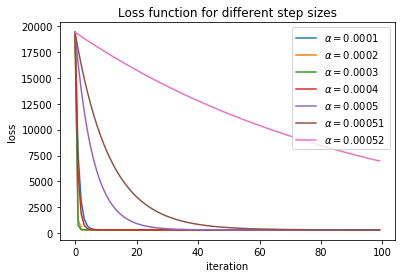

In [9]:
plt.plot(loss_values_1, label=r'$\alpha=$'+str(alpha_1))
plt.plot(loss_values_2, label=r'$\alpha=$'+str(alpha_2))
plt.plot(loss_values_3, label=r'$\alpha=$'+str(alpha_3))
plt.plot(loss_values_4, label=r'$\alpha=$'+str(alpha_4))
plt.plot(loss_values_5, label=r'$\alpha=$'+str(alpha_5))
plt.plot(loss_values_6, label=r'$\alpha=$'+str(alpha_6))
plt.plot(loss_values_7, label=r'$\alpha=$'+str(alpha_7))
plt.gca().set_ylabel('loss')
plt.gca().set_xlabel('iteration')
plt.gca().set_title('Loss function for different step sizes')
plt.legend()
